In [1]:
import re
from itertools import product

import numpy as np
import numpy.typing as npt
from matplotlib import pyplot as plt
from test_utilities import run_tests_params

<link href="style.css" rel="stylesheet"></link>
<article class="day-desc"><h2>--- Day 6: Probably a Fire Hazard ---</h2><p>Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a <span title="Hey, be glad I'm not asking for the resistance between two points!">1000x1000 grid</span>.</p>
<p>Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.</p>
<p>Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at <code>0,0</code>, <code>0,999</code>, <code>999,999</code>, and <code>999,0</code>. The instructions include whether to <code>turn on</code>, <code>turn off</code>, or <code>toggle</code> various inclusive ranges given as coordinate pairs.  Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like <code>0,0 through 2,2</code> therefore refers to 9 lights in a 3x3 square.  The lights all start turned off.
</p><p>To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.</p>
<p>For example:</p>
<ul>
<li><code>turn on 0,0 through 999,999</code> would turn on (or leave on) every light.</li>
<li><code>toggle 0,0 through 999,0</code> would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.</li>
<li><code>turn off 499,499 through 500,500</code> would turn off (or leave off) the middle four lights.</li>
</ul>
<p>After following the instructions, <em>how many lights are lit</em>?</p>
</article>


In [2]:
tests = [
    {
        "name": "Example 1",
        "s": """
        turn on 0,0 through 999,999
        toggle 0,0 through 999,0
        turn off 499,499 through 500,500
        """,
        "expected": 1_000_000 - 1_000 - 4,
    },
]


def how_many_lights_are_lit(s: str, lights: npt.NDArray | None = None) -> int:
    if lights is None:
        lights = np.zeros((1_000, 1_000))

    for line in s.strip().splitlines():
        line = line.strip()
        line = re.sub(r"\s+through\s+", ",", line)
        if line.startswith("turn on "):
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[8:].split(",")]
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = 125
        elif line.startswith("turn off "):
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[9:].split(",")]
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = 0
        else:
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[7:].split(",")]
            swap = np.vectorize(lambda v: 0 if v == 125 else 125)
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = swap(
                lights[r_fr : r_to + 1, c_fr : c_to + 1]
            )

    return np.count_nonzero(lights)


run_tests_params(how_many_lights_are_lit, tests)


Test Example 1 passed, for how_many_lights_are_lit.
Success


36504


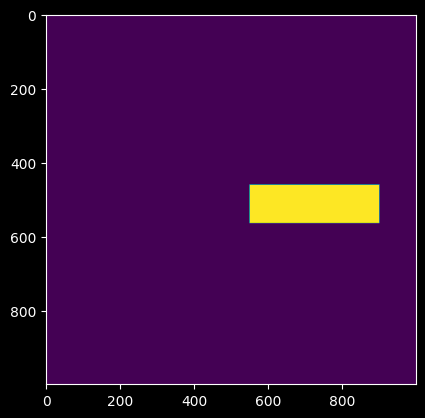

In [3]:
import numpy as np
from matplotlib import pyplot as plt

s = """
toggle 461,550 through 564,900
"""
lights = np.zeros((1_000, 1_000))
print(how_many_lights_are_lit(s, lights))

plt.imshow(np.array(lights.T))
plt.show()

543903


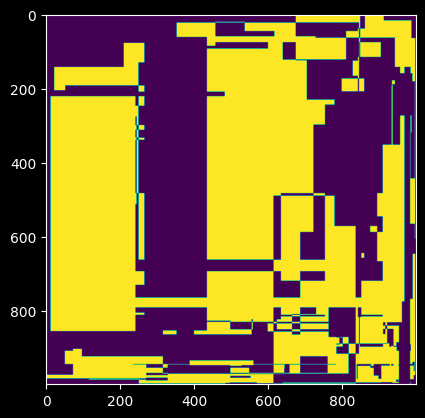

In [4]:
with open("../input/day6.txt") as f:
    s = f.read()

lights = np.zeros((1_000, 1_000))
print(how_many_lights_are_lit(s, lights))

plt.imshow(np.array(lights).T)
plt.show()

<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>543903</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish.</p>
<p>The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more.  The lights all start at zero.</p>
<p>The phrase <code>turn on</code> actually means that you should increase the brightness of those lights by <code>1</code>.</p>
<p>The phrase <code>turn off</code> actually means that you should decrease the brightness of those lights by <code>1</code>, to a minimum of zero.</p>
<p>The phrase <code>toggle</code> actually means that you should increase the brightness of those lights by <code>2</code>.</p>
<p>What is the <em>total brightness</em> of all lights combined after following Santa's instructions?</p>
<p>For example:</p>
<ul>
<li><code>turn on 0,0 through 0,0</code> would increase the total brightness by <code>1</code>.</li>
<li><code>toggle 0,0 through 999,999</code> would increase the total brightness by <code>2000000</code>.</li>
</ul>
</article>

</main>


In [5]:
tests = [
    {
        "name": "Example 2",
        "s": """
        turn on 0,0 through 0,0
        """,
        "expected": 1,
    },
    {
        "name": "Example 3",
        "s": """
        toggle 0,0 through 999,999 
        """,
        "expected": 2_000_000,
    },
    {
        "name": "Example 4",
        "s": """
        turn off 499,499 through 500,500
        """,
        "expected": 0,
    },
    {
        "name": "Example 1",
        "s": """
        turn on 0,0 through 999,999
        toggle 0,0 through 999,0
        turn off 499,499 through 500,500
        """,
        "expected": 1_000_000 + 2 * 1_000 - 4,
    },
]


def total_brightness(s: str, lights: npt.NDArray | None = None) -> int:
    if lights is None:
        lights = np.zeros((1_000, 1_000))

    for line in s.strip().splitlines():
        line = line.strip()
        line = re.sub(r"\s+through\s+", ",", line)
        if line.startswith("turn on "):
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[8:].split(",")]
            add_1 = np.vectorize(lambda v: v + 1)
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = add_1(
                lights[r_fr : r_to + 1, c_fr : c_to + 1]
            )
        elif line.startswith("turn off "):
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[9:].split(",")]
            min_1 = np.vectorize(lambda v: v - 1 if v else v)
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = min_1(
                lights[r_fr : r_to + 1, c_fr : c_to + 1]
            )
        else:
            c_fr, r_fr, c_to, r_to = [int(i) for i in line[7:].split(",")]
            add_2 = np.vectorize(lambda v: v + 2)
            lights[r_fr : r_to + 1, c_fr : c_to + 1] = add_2(
                lights[r_fr : r_to + 1, c_fr : c_to + 1]
            )

    return int(lights.sum())


run_tests_params(total_brightness, tests)


Test Example 2 passed, for total_brightness.
Test Example 3 passed, for total_brightness.
Test Example 4 passed, for total_brightness.
Test Example 1 passed, for total_brightness.
Success


1001996


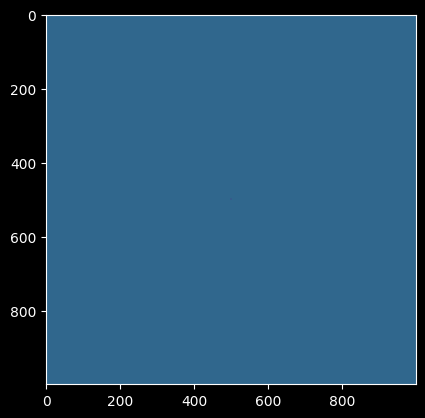

In [6]:
import numpy as np
from matplotlib import pyplot as plt

s = """
turn on 0,0 through 999,999
toggle 0,0 through 999,0
turn off 499,499 through 500,500
"""
lights = np.zeros((1_000, 1_000))
print(total_brightness(s, lights))

plt.imshow(np.array(lights.T))
plt.show()

14687245


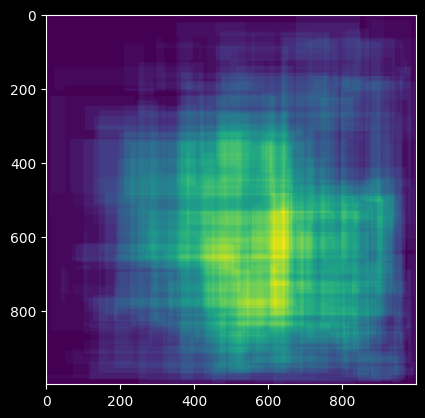

In [7]:
with open("../input/day6.txt") as f:
    s = f.read()

lights = np.zeros((1_000, 1_000))
print(total_brightness(s, lights))

plt.imshow(np.array(lights).T)
plt.show()

<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>14687245</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2015">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="6/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22Probably+a+Fire+Hazard%22+%2D+Day+6+%2D+Advent+of+Code+2015&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2015%2Fday%2F6&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22Probably+a+Fire+Hazard%22+%2D+Day+6+%2D+Advent+of+Code+2015+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2015%2Fday%2F6';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>
